In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3


rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

#import mplhep as hep
#hep.set_style(hep.style.ROOT)

/home/marratia/.local/lib/python3.6/site-packages/uproot3/__init__.py:138: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  FutureWarning
/home/marratia/.local/lib/python3.6/site-packages/awkward0/__init__.py:23: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  FutureWarning


In [2]:
#
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
# Define default plot styles
plot_style_0 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'linestyle': '--',
    'density': True
}

plot_style_1 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': True
}

plot_style_2 = {'alpha': 0.5, 'density': True}

plot_style_1A = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': False
}

plot_style_2A = {'alpha': 0.5, 'density': False}


In [4]:
def get_Dataframe(path, name='Data'):
    Files = listdir(path) 
    #print (Files)
    df = None
    for f in Files:
        if name not in f: continue
        filename = path+f
        print ('filename is' , filename)
        
        temp_file = uproot3.open(filename)
        
        hasTree = False 
        for key in temp_file[name].keys():
            if('minitree' in str(key)):
                hasTree=True
        if (not hasTree):
            print('file has not minitree, skipping')
            continue

        temp_tree = temp_file[name+'/minitree']

        
        temp_df = None
        
        if 'Data' not in name:
            try:
                temp_df   =  temp_tree.pandas.df(["Q2","gen_Q2","y",'gen_y',"tau*", "gen_tau*"], entrystop=3e6,flatten=True)
                df = pd.concat([df,temp_df])
            except ValueError:
                print ('oops, there is a problem in flattening the TTree ')
        else:
            try:
                temp_df   =  temp_tree.pandas.df(["tau*","Q2","y"], entrystop=3e6,flatten=True) 
                df = pd.concat([df,temp_df])
            except ValueError:
                print ('oops, there is a problem in flattening the TTree ')
        
        #try:
        #    df.shape[0]
        #except ValueError:
        #    print('no valid dataframe')
    print('####################################################################')
    print('Dataframe has a total of ', df.shape[0], ' entries')
    print('####################################################################')

    return df


In [5]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [6]:
def applyCutsJets(df,isMC=False):
    temp = df

    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('Q = sqrt(Q2)', inplace=True)
    temp = applyCut(temp, 'pass_reco==0 | 0.08 < y < 0.7', '0.08 < y < 0.7')
    temp = applyCut(temp, 'pass_reco==0 | Q2>150', 'Q2>150')

    if(isMC):
        temp.eval('gen_logQ2= log(gen_Q2)/2.3025850', inplace=True)   
        temp.eval('gen_Q    = sqrt(gen_Q2)', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## Get dataframes, apply selection

In [7]:
mc_name = 'Django'
altmc_name = 'Rapgap'

#altmc_name = 'Rapgap'
#mc_name = 'Django'

In [8]:
#path= '/data0/users/marratia/HERAdata/21-01-06-00-34-test17/out_ep0304/'
#path = '/data0/users/marratia/HERAdata/out_ep0607/'
path = '/data0/users/marratia/HERAdata/test21/out_ep0607/'
data = get_Dataframe(path, name='Data')

filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Data_Eplus0607_0.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Data_Eplus0607_2.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Data_Eplus0607_3.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Data_Eplus0607_1.root
####################################################################
Dataframe has a total of  355805  entries
####################################################################


In [9]:
mc = get_Dataframe(path, name=mc_name)


filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Django_Eplus0607_125.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Django_Eplus0607_116.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Django_Eplus0607_153.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Django_Eplus0607_18.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Django_Eplus0607_107.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Django_Eplus0607_143.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Django_Eplus0607_137.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Django_Eplus0607_127.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Django_Eplus0607_120.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Django_Eplus0607_129.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Django_Eplus0607_4.root
file has not minitree, skipping
filename is /d

In [10]:
altmc = get_Dataframe(path, name=altmc_name)


filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Rapgap_Eplus0607_118.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Rapgap_Eplus0607_12.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Rapgap_Eplus0607_9.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Rapgap_Eplus0607_144.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Rapgap_Eplus0607_115.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Rapgap_Eplus0607_101.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Rapgap_Eplus0607_108.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Rapgap_Eplus0607_116.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Rapgap_Eplus0607_143.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Rapgap_Eplus0607_128.root
filename is /data0/users/marratia/HERAdata/test21/out_ep0607/Rapgap_Eplus0607_147.root
filename is /data0/users/marratia/HERAdata/tes

## Defining pass reco and pass truth variables

In [11]:
mc['pass_reco'] = np.where(mc['Q2']>0, 1, 0)
mc['pass_truth'] = np.where(mc['Q2']>0, 1, 0)
altmc['pass_reco'] = np.where(altmc['Q2']>0, 1, 0)
altmc['pass_truth'] = np.where(altmc['Q2']>0, 1, 0)
data['pass_reco'] = np.where(data['Q2']>0, 1, 0)

In [12]:
mc.keys()

Index(['Q2', 'gen_Q2', 'y', 'gen_y', 'tau1b', 'tauzQ', 'gen_tau1b',
       'gen_tauzQ', 'pass_reco', 'pass_truth'],
      dtype='object')

## Event selection

In [13]:
print('Selecting data events\n')
data = applyCutsJets(data)
print('Selecting MC events\n')
mc   = applyCutsJets(mc, isMC=True)
print('alt mc\n')
altmc = applyCutsJets(altmc, isMC=True)

Selecting data events

0.08 < y < 0.7 257760  fraction kept: 72.4
Q2>150 215810  fraction kept: 83.7
Selecting MC events

0.08 < y < 0.7 16444225  fraction kept: 88.7
Q2>150 14044901  fraction kept: 85.4
alt mc

0.08 < y < 0.7 13643186  fraction kept: 88.7
Q2>150 11776619  fraction kept: 86.3


In [14]:
label_DISselection = r'$Q^{2}>150$ GeV$^{2}, 0.08<y<0.7$'

In [15]:
mc.head()

,Q2,gen_Q2,y,gen_y,tau1b,tauzQ,gen_tau1b,gen_tauzQ,pass_reco,pass_truth,logQ2,Q,gen_logQ2,gen_Q
entry,,,,,,,,,,,,,,
0,189.964752,192.151474,0.627049,0.608445,0.558825,0.447748,0.507809,0.507817,1,1,2.278673,13.782770,2.283644,13.861871
1,284.793488,286.446198,0.139416,0.125826,0.000000,0.881543,0.000000,0.814632,1,1,2.454530,16.875826,2.457043,16.924721
3,2275.745605,2342.706543,0.204995,0.196845,0.000000,0.155816,0.000000,0.116142,1,1,3.357124,47.704777,3.369718,48.401512
5,405.876282,356.158264,0.421544,0.409389,0.198633,0.330143,0.282420,0.161386,1,1,2.608394,20.146372,2.551643,18.872156
6,215.915329,214.760406,0.321634,0.326079,0.544731,0.562895,0.567540,0.567532,1,1,2.334284,14.694057,2.331954,14.654706


## Plot a few distributions at reco and truth level 

/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


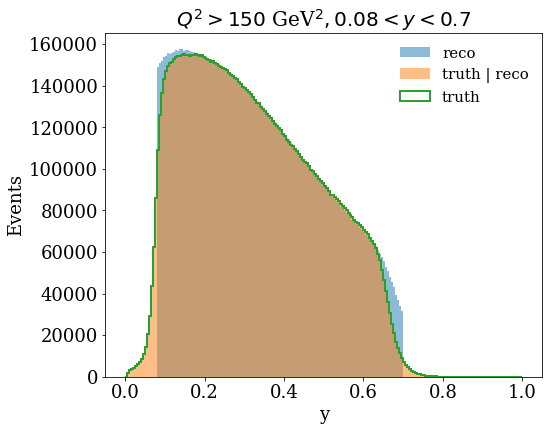

In [16]:
fig = plt.figure(figsize=(8,6))
plt.hist(mc.query('pass_reco==1 ')['y'],range=(0,1),bins=200,label='reco',alpha=0.5)
plt.hist(mc.query('pass_reco==1 ')['gen_y'],range=(0,1),bins=200, label='truth | reco',alpha=0.5)
plt.hist(mc['gen_y'],range=(0,1),bins=200, label='truth',histtype='step',lw=2)
plt.xlabel(r'y')
plt.ylabel('Events')
plt.legend(loc='best')
plt.tight_layout()
plt.title(label_DISselection,fontsize=20)
plt.show()
fig.savefig('figures/y.png')    

In [17]:
mc_cut = mc[:2000000]
altmc_cut = altmc[:200000]

In [18]:
print(len(data))
print(len(mc_cut.query('pass_reco==1'))) ##only what is really reconstructed counts
print(len(mc_cut)) ##only what is really reconstructed counts
print(len(altmc_cut.query('pass_reco==1'))) ##only what is really reconstructed counts


215810
2000000
2000000
200000


### Define UniFold Algorithm


In [19]:
from __future__ import absolute_import, division, print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
import keras.backend as K
from keras.layers import Dense, Input
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages

## Define features using just MC and alt MC *this is CLOSURE TEST*

In [20]:
mc_cut.keys()

Index(['Q2', 'gen_Q2', 'y', 'gen_y', 'tau1b', 'tauzQ', 'gen_tau1b',
       'gen_tauzQ', 'pass_reco', 'pass_truth', 'logQ2', 'Q', 'gen_logQ2',
       'gen_Q'],
      dtype='object')

In [21]:
Q_0_G       = mc_cut['gen_Q']
Q_0_S       = mc_cut['Q']
Q_unknown_G = altmc_cut['gen_Q']
Q_unknown_S = altmc_cut['Q']


y_0_G       = mc_cut['gen_y']
y_0_S       = mc_cut['y']
y_unknown_G = altmc_cut['gen_y']
y_unknown_S = altmc_cut['y']

tauzQ_0_G       = mc_cut['gen_tauzQ']
tauzQ_0_S       = mc_cut['tauzQ']
tauzQ_unknown_G = altmc_cut['gen_tauzQ']
tauzQ_unknown_S = altmc_cut['tauzQ']

In [22]:
theta0_G=np.c_[(Q_0_G,y_0_G,tauzQ_0_G)]
theta0_S=np.c_[(Q_0_S,y_0_S,tauzQ_0_S)]
theta_unknown_G=np.c_[(Q_unknown_G,y_unknown_G,tauzQ_unknown_G)]
theta_unknown_S=np.c_[(Q_unknown_S,y_unknown_S,tauzQ_unknown_S)]


In [23]:
pass_reco = np.array(mc_cut['pass_reco'])
pass_truth = np.array(mc_cut['pass_truth'])
theta0_S[:,0][pass_reco==0] = -10
theta0_G[:,0][pass_truth==0] = -10

## Show input for closure test (i.e. synthetic and natural datasets using mc and altmc)

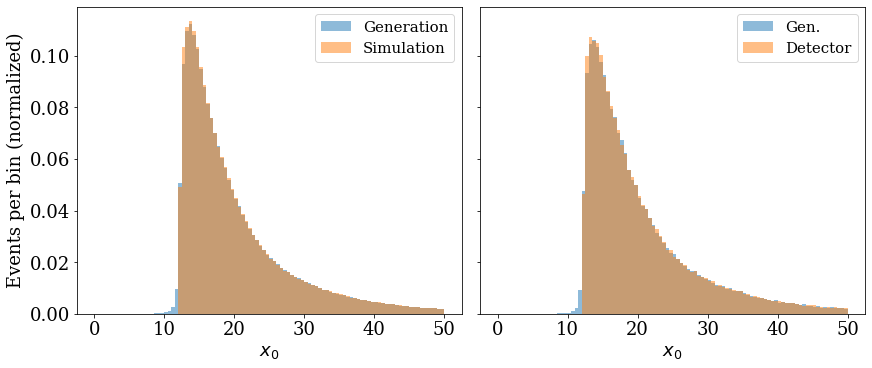

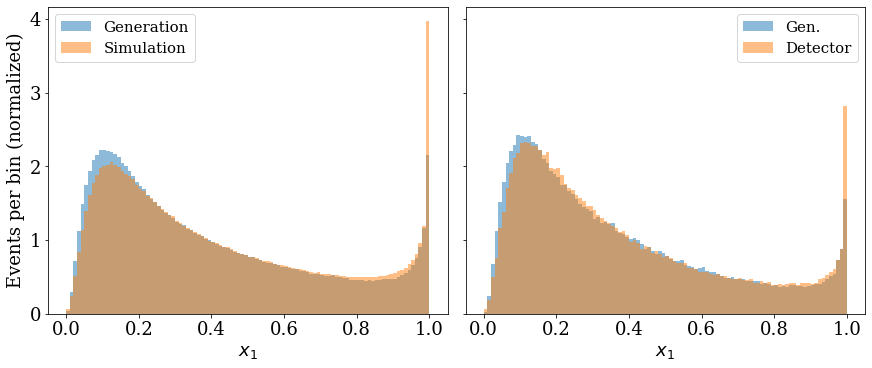

In [24]:
bins = np.linspace(0,50, 101)
fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 5),
                       constrained_layout=True,
                       sharey=True)

ax[0].set_xlabel('$x_0$')
ax[0].set_ylabel('Events per bin (normalized)')
ax[0].hist(theta0_G[theta0_G[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Generation')
ax[0].hist(theta0_S[theta0_S[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Simulation')
legend = ax[0].legend(
    loc='best',
    frameon=True)
plt.setp(legend.get_title(), multialignment='center')

ax[1].set_xlabel('$x_0$')

ax[1].hist(theta_unknown_G[theta_unknown_S[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Gen.')
legend = ax[1].legend(
    loc='best',
    frameon=True)


ax[1].hist(theta_unknown_S[theta_unknown_S[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Detector')
legend = ax[1].legend(
    loc='best',
    frameon=True)
plt.setp(legend.get_title(), multialignment='center')

fig.show()

bins = np.linspace(0,1, 101)
#bins = np.linspace(0,2, 101)
#bins = np.linspace(0,1,100)
fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 5),
                       constrained_layout=True,
                       sharey=True)

ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('Events per bin (normalized)')
ax[0].hist(theta0_G[theta0_G[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Generation')
ax[0].hist(theta0_S[theta0_S[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Simulation')
legend = ax[0].legend(
    loc='best',
    frameon=True)
plt.setp(legend.get_title(), multialignment='center')

ax[1].set_xlabel('$x_1$')

ax[1].hist(theta_unknown_G[theta_unknown_S[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Gen.')
legend = ax[1].legend(
    loc='best',
    frameon=True)

ax[1].hist(theta_unknown_S[theta_unknown_S[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Detector')
legend = ax[1].legend(
    loc='best',
    frameon=True)






plt.setp(legend.get_title(), multialignment='center')

fig.show()

## Define Multifold 

In [25]:
# Input multiple observables as tuple or list (i.e. theta0_G = (obs_1, obs_2, ...))
"""    Arguments:
        num_observables: number of observables to 
                            simultaneously unfold (integer)
                            
        iterations: number of iterations (integer)
        
        theta0_G: tuple or list of nominal 
                    generation-level observables as Numpy arrays
                    
        theta0_S: tuple or list of nominal 
                    simulation-level observables as Numpy arrays
                    
        theta_unknown_S: tuple or list of "natural" 
                            (unknown) simulation-level observables 
                            to be unfolded as Numpy arrays
        
        Returns:
        - A Numpy array of weights to reweight distributions in 
        theta0_G to the unfolded distribution of theta_unknown_S
        
        - The model used to calculate those weights
"""


def multifold(num_observables, iterations, theta0_G, theta0_S,
              theta_unknown_S,verbose=1):
    
    
    theta0 = np.stack([theta0_G, theta0_S], axis=1)
    labels0 = np.zeros(len(theta0))
    theta_unknown = np.stack([theta_unknown_S, theta_unknown_S], axis=1)
    labels1 = np.ones(len(theta0_G))
    labels_unknown = np.ones(len(theta_unknown_S))
    
    xvals_1 = np.concatenate((theta0_S, theta_unknown_S))
    yvals_1 = np.concatenate((labels0, labels_unknown))
    xvals_2 = np.concatenate((theta0_G, theta0_G))
    yvals_2 = np.concatenate((labels0, labels1))
    

    weights = np.empty(shape=(iterations, 2, len(theta0_G))) #this was 0
    weights_pull = np.ones(len(theta0_S))
    weights_push = np.ones(len(theta0_S))

    inputs = Input((num_observables, ))
     #inputs = Input((2, ))
    hidden_layer_1 = Dense(50, activation='relu')(inputs)
    hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
    outputs = Dense(1, activation='sigmoid')(hidden_layer_3)

    model = Model(inputs=inputs, outputs=outputs)

    earlystopping = EarlyStopping(patience=10,
                              verbose=verbose,
                              restore_best_weights=True)
    # from NN (DCTR) 
    def reweight(events):
        f = model.predict(events, batch_size=10000)
        weights = f / (1. - f)
        return np.squeeze(np.nan_to_num(weights))
    
    
    
    for i in range(iterations):
        print("\nITERATION: {}\n".format(i + 1))

        # STEP 1: classify Sim. (which is reweighted by weights_push) to Data
        # weights reweighted Sim. --> Data
        print("STEP 1\n")

        weights_1 = np.concatenate((weights_push, np.ones(len(theta_unknown_S))))
        # actual weights for Sim., ones for Data (not MC weights)

        X_train_1, X_test_1, Y_train_1, Y_test_1, w_train_1, w_test_1 = train_test_split(
            xvals_1, yvals_1, weights_1)

        #theta0_G[theta0_S[:,0]!=-10][:,1]
        model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
        model.fit(X_train_1[X_train_1[:,0]!=-10],
              Y_train_1[X_train_1[:,0]!=-10],
              sample_weight=w_train_1[X_train_1[:,0]!=-10],
              epochs=200,
              batch_size=10000,
              validation_data=(X_test_1[X_test_1[:,0]!=-10], Y_test_1[X_test_1[:,0]!=-10], w_test_1[X_test_1[:,0]!=-10]),
              callbacks=[earlystopping],
              verbose=verbose)

        weights_pull = weights_push * reweight(theta0_S)
        weights_pull[theta0_S[:,0]==-10] = 1. #these are events that don't pass reco; take the prior.
        weights[i, :1, :] = weights_pull

        # STEP 2: classify Gen. to reweighted Gen. (which is reweighted by weights_pull)
        # weights Gen. --> reweighted Gen.
        print("\nSTEP 2\n")

        weights_2 = np.concatenate((np.ones(len(theta0_G)), weights_pull))
        # ones for Gen. (not MC weights), actual weights for (reweighted) Gen.

        X_train_2, X_test_2, Y_train_2, Y_test_2, w_train_2, w_test_2 = train_test_split(
            xvals_2, yvals_2, weights_2)

        model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
        model.fit(X_train_2,
              Y_train_2,
              sample_weight=w_train_2,
              epochs=200,
              batch_size=10000,
              validation_data=(X_test_2, Y_test_2, w_test_2),
              callbacks=[earlystopping],
              verbose=verbose)

        weights_push = reweight(theta0_G)
        weights[i, 1:2, :] = weights_push
    return weights, model

## Unfold

In [26]:
K.clear_session()

In [27]:
iterations = 4# use ~4 iterations
num_observables= 3

weights, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=theta0_G,
                       theta0_S=theta0_S,
                       theta_unknown_S= theta_unknown_S, verbose=0)


ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 3

STEP 1


STEP 2


ITERATION: 4

STEP 1


STEP 2



## Put weights into MC dataframe

In [28]:
mc_cut['weight_reco'] = weights[-1, 0, :]
mc_cut['weight_truth'] = weights[-1, 1, :]

/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Check that weights are reasonable

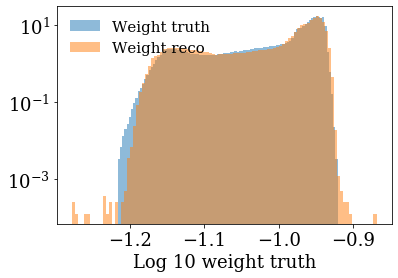

0.12771250307559967
0.04975038766860962
0.13005949556827545
0.029935143887996674
 
0.12575691938400269
0.04727989807724953
0.13588428497314453
0.06664219498634338
 
0.13203325867652893
0.050047192722558975
0.12700814008712769
0.058430615812540054
 
0.11998512595891953
0.060816776007413864
0.13533301651477814
0.05281512439250946
 


In [29]:
plt.hist(np.log10(mc_cut['weight_truth']),bins=100,**plot_style_2,label='Weight truth')
plt.hist(np.log10(mc_cut['weight_reco']),bins=100,**plot_style_2, label='Weight reco')
plt.legend()
plt.xlabel('Log 10 weight truth')
plt.yscale('log')
plt.show()

for i in range(len(weights)):
    print(max(weights[i, 1, :]))
    print(min(weights[i, 1, :]))
    print(max(weights[i, 0, :]))
    print(min(weights[i, 0, :]))
    print(' ')

## Remove some large weights 

In [30]:
print(len(mc_cut))
mc_cut.query('weight_truth>10000')
print(len(mc_cut.query(' weight_reco>0.01')))

mc_cut = mc_cut.query('weight_reco<100 and weight_reco>0.01')
#altmc_cut = altmc_cut.query('weight_truth<10000')
print(len(mc_cut))

mc_cut = mc_cut.query('weight_truth<100 and weight_truth>0.01')
print(len(mc_cut))

2000000
2000000
2000000
2000000


## Closure Test

The query is: pass_reco==1 and gen_y>0.2 and gen_y<0.7 and gen_Q2>150
ITERATION: 3
ITERATION: 4


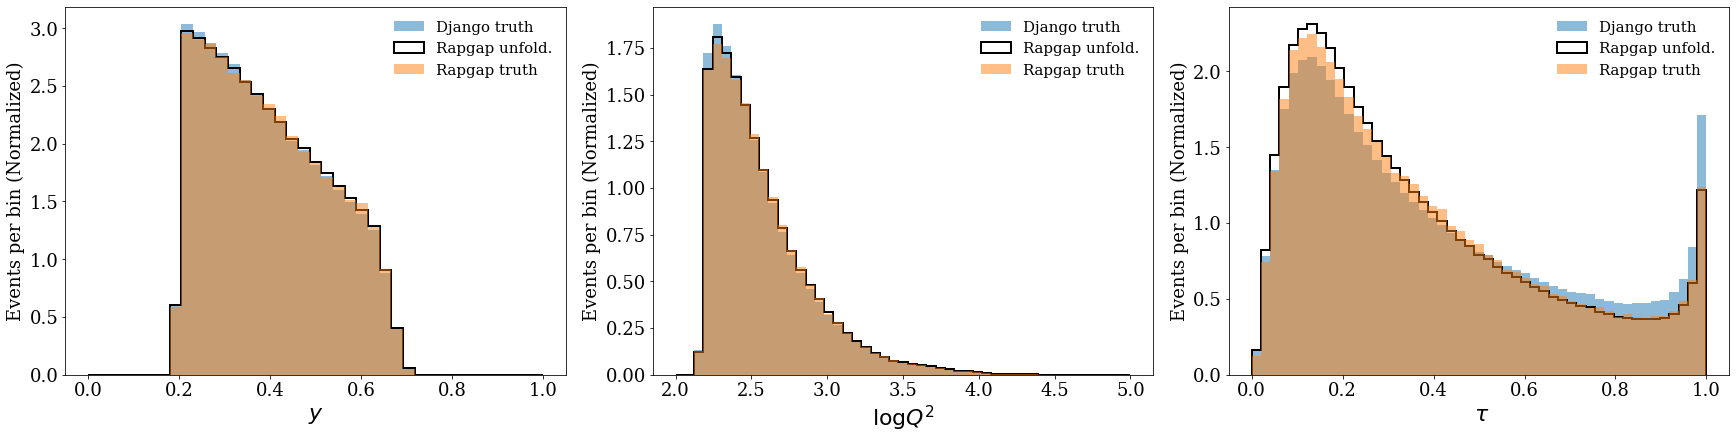

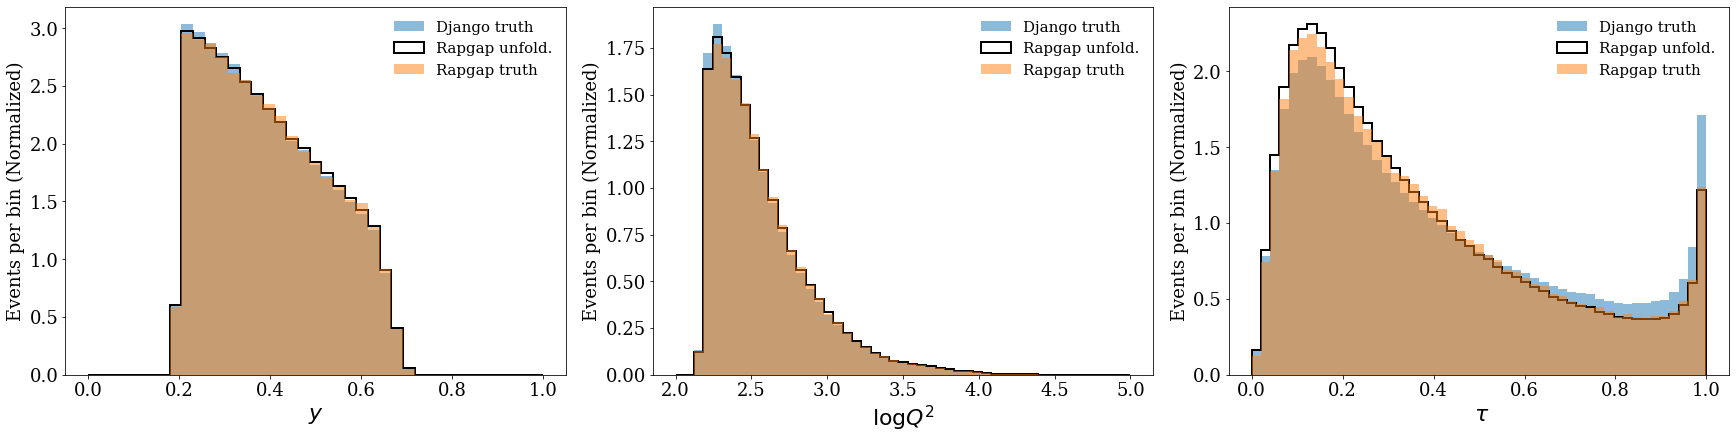

In [31]:
event_selection = 'gen_y>0.2 and gen_y<0.7 and gen_Q2>150'
#track_selection = 'gen_track_pt>0.2'
query = 'pass_reco==1 and ' + event_selection
print('The query is:' , query)

label1 = mc_name +' truth'
label2 = altmc_name + ' unfold.'
label3 = altmc_name + ' truth '


for i in range(len(weights)):
    if(i<2): continue
    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2, 5,100 )
    #bins = np.linspace(5, 50, 45)

    fig, ax = plt.subplots(1,
                           3,
                           figsize=(24, 6),
                           constrained_layout=True)
    
    ax = ax.flatten()
    
    bins = np.linspace(0.0, 1.0,40 )

    ax[0].set_xlabel(r'$y$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(mc_cut.query(query)['gen_y'], bins=bins, label=label1, **plot_style_2)
    ax[0].hist(mc_cut.query(query)['gen_y'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[0].hist(altmc_cut.query(query)['gen_y'],
               bins=bins,
               label=label3,
               **plot_style_2)
    
    ax[0].legend(frameon=False)

    bins = np.linspace(2, 5,50 )

    ax[1].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(mc_cut.query(query)['gen_logQ2'], bins=bins, label=label1, **plot_style_2)
    ax[1].hist(mc_cut.query(query)['gen_logQ2'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[1].hist(altmc_cut.query(query)['gen_logQ2'],
               bins=bins,
               label=label3,
               **plot_style_2)
    
    ax[1].legend(frameon=False)

    

    bins = np.linspace(0,1,50 )

    ax[2].set_xlabel(r' $\tau$',fontsize=22)
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(mc_cut.query(query)['gen_tauzQ'], bins=bins, label=label1, **plot_style_2)
    ax[2].hist(mc_cut.query(query)['gen_tauzQ'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[2].hist(altmc_cut.query(query)['gen_tauzQ'],
               bins=bins,
               label=label3,
               **plot_style_2)
    
    ax[2].legend(frameon=False)



## Show the reweighting of the reco

The query is: pass_reco==1 
ITERATION: 3
ITERATION: 4


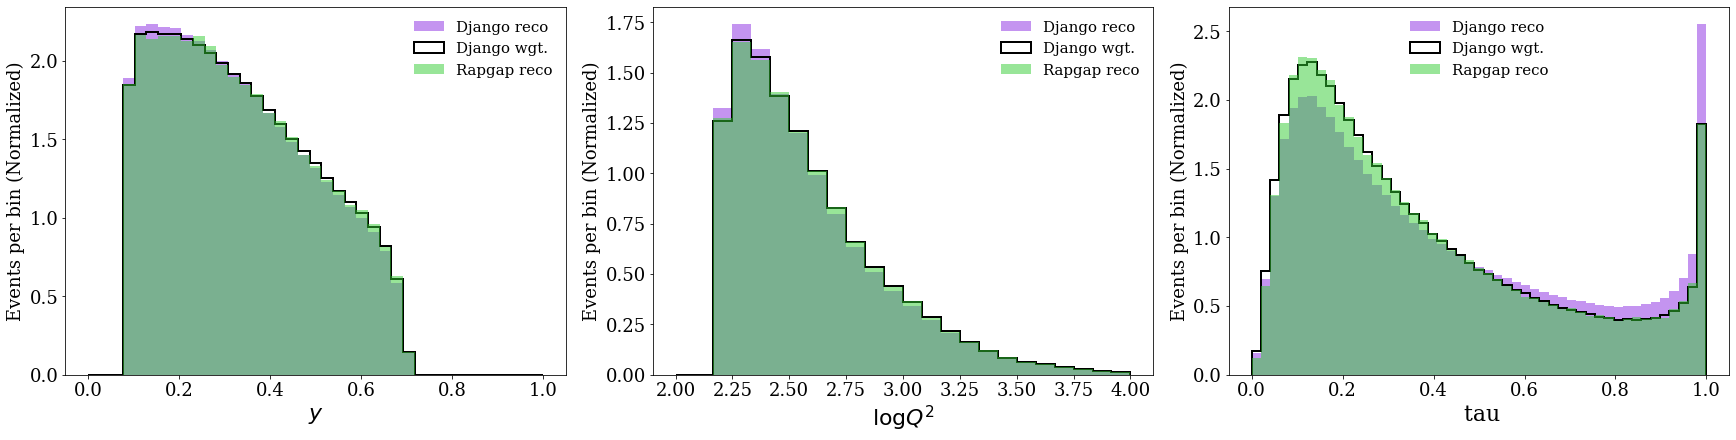

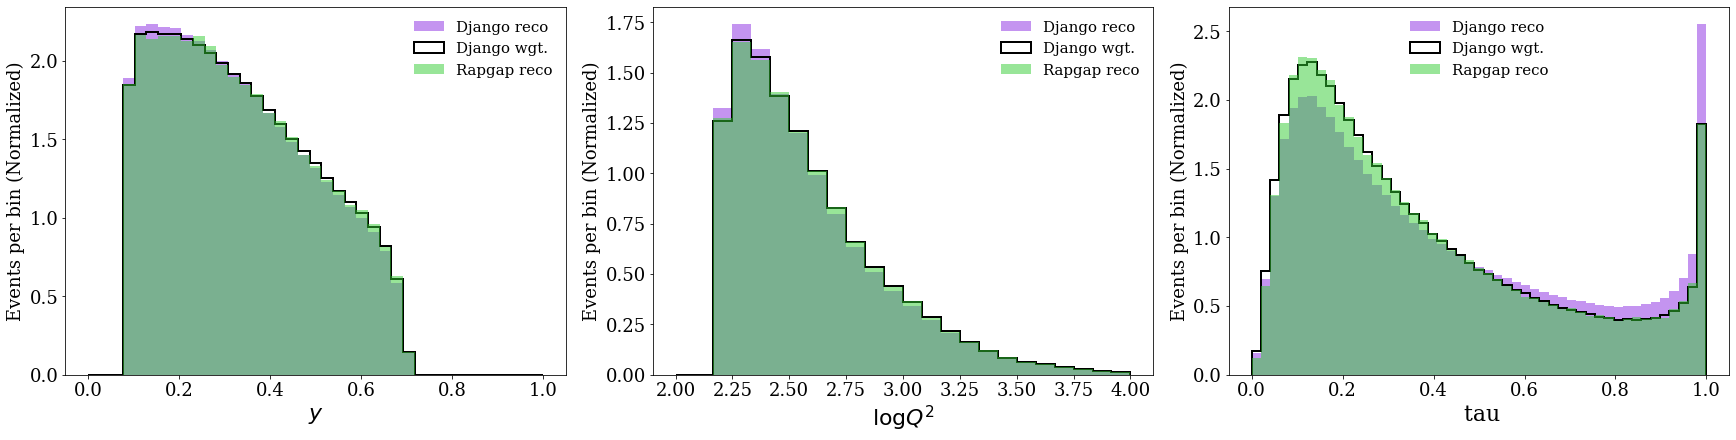

In [32]:
query = 'pass_reco==1 '
print('The query is:' , query)
label1 = mc_name +' reco'
label2 = mc_name +' wgt.'
label3 = altmc_name +' reco'

color1='blueviolet'
color2='limegreen'
for i in range(len(weights)):
    if(i<2): continue

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2, 5,100 )
    fig, ax = plt.subplots(1,
                           3,
                           figsize=(24, 6),
                           constrained_layout=True)
    bins = np.linspace(0.0, 1.0,40 )
    
    ax = ax.flatten()

    ax[0].set_xlabel(r'$y$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(mc_cut.query(query)['y'], bins=bins, label=label1, **plot_style_2,color=color1)
    ax[0].hist(mc_cut.query(query)['y'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=label2,
               **plot_style_1)

    ax[0].hist(altmc_cut.query(query)['y'],
               bins=bins,
               label=label3,
               **plot_style_2,color=color2)
    
    ax[0].legend(frameon=False,loc='best')

    bins = np.linspace(2, 4,25 )

    ax[1].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(mc_cut.query(query)['logQ2'], bins=bins, label=label1, **plot_style_2,color=color1)
    ax[1].hist(mc_cut.query(query)['logQ2'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=label2,
               **plot_style_1)

    ax[1].hist(altmc_cut.query(query)['logQ2'],
               bins=bins,
               label=label3,
               **plot_style_2,color=color2)
    
    ax[1].legend(frameon=False,loc='best')

    
    bins = np.linspace(0,1,50 )

    ax[2].set_xlabel(' tau',fontsize=22)
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(mc_cut.query(query)['tauzQ'], bins=bins, label=label1, **plot_style_2,color=color1)
    ax[2].hist(mc_cut.query(query)['tauzQ'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=label2,
               **plot_style_1)

    ax[2].hist(altmc_cut.query(query)['tauzQ'],
               bins=bins,
               label=label3,
               **plot_style_2,color=color2)
    #ax[0,2].set_yscale('log')
    #ax[0,2].set_xscale('log')
    ax[2].legend(frameon=False,loc='best')

  

## Check re-weighting at reco level for differential plots

Q>12.00 and Q<25.00 and pass_reco==1
###########
Q>25.00 and Q<50.00 and pass_reco==1
###########
Q>50.00 and Q<100.00 and pass_reco==1
###########


Text(0, 0.5, 'Normalized entries')

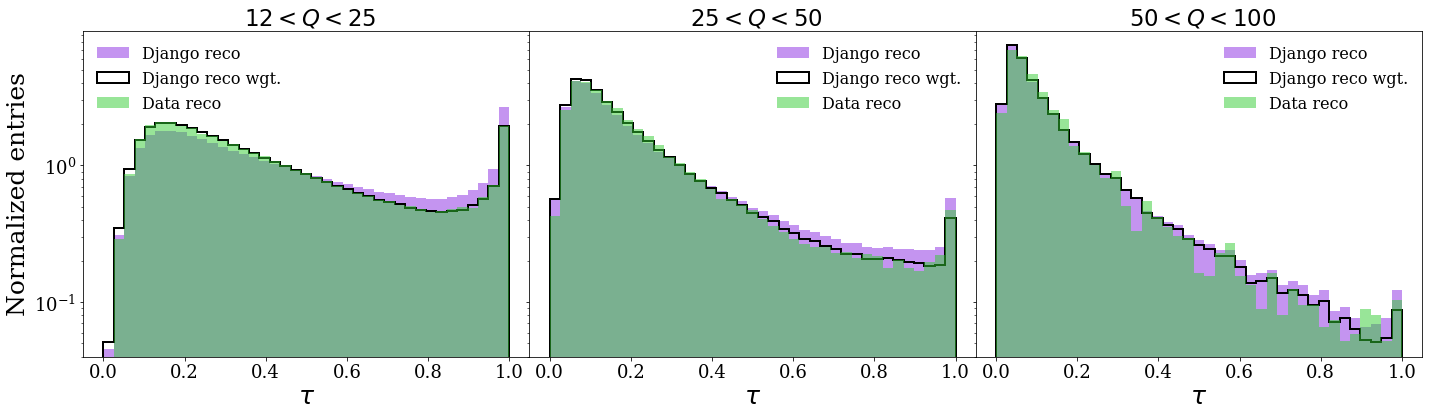

In [33]:
#bins = np.logspace(np.log10(0.01),np.log10(3),8)
bins = np.linspace(0,1,40)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(24,6), gridspec_kw={'wspace':0, 'hspace':0})

for counter,edges in enumerate([(12,20), (20,30),(30,50)]):
    #cut = ' Q2 > %2.2f and Q2 <%2.2f and pass_reco==1'%(edges[0],edges[1])
    cut = 'Q>%2.2f and Q<%2.2f and pass_reco==1'%(edges[0],edges[1])
    print (cut)
    print ('###########')

    axs[counter].xaxis.set_label_text(r'$\tau$', fontsize=25)


    
    axs[counter].hist(mc_cut.query(cut)['tauzQ'], bins=bins, label=mc_name+' reco', **plot_style_2,color=color1)
    axs[counter].hist(mc_cut.query(cut)['tauzQ'],
               bins=bins,
               weights=mc_cut.query(cut)['weight_reco'],
               label=mc_name +' reco wgt.',
               **plot_style_1)
    axs[counter].hist(altmc_cut.query(cut)['tauzQ'],
               bins=bins,
               label='Data reco',
               **plot_style_2,color=color2)    
    
    
    axs[counter].legend(prop={'size': 16}, frameon=False, loc='best')
    axs[counter].set_title(' $ %2.0f< Q < %2.0f$'%(edges[0],edges[1]))


    #axs[counter].text(1.5,2.9,  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(data_cut.query(cut)['x'].mean(), data_cut.query(cut)['Q2'].mean()), fontsize=18)
    axs[counter].set_yscale('log')
    #axs[counter].set_xscale('log')

 
axs[0].yaxis.set_label_text('Normalized entries', fontsize=25)



## Closure Test

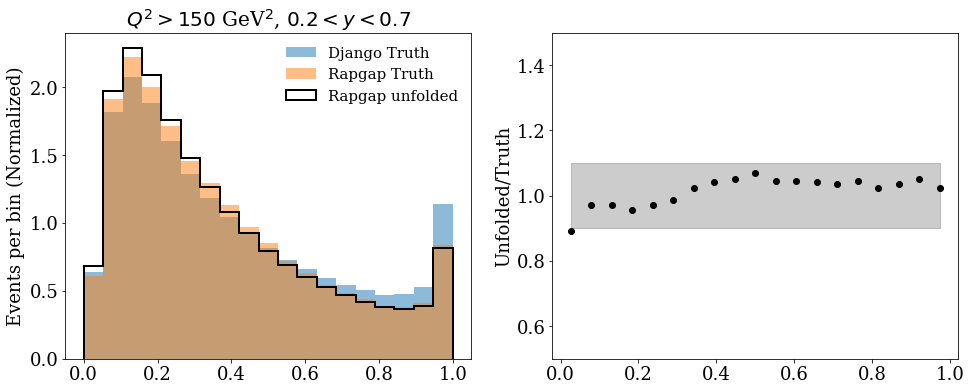

In [34]:
fig,ax = plt.subplots(1,2,figsize=(16, 6))

cut = ' gen_Q2 > 150 and gen_y>0.2 and gen_y<0.7'
cut = cut + ' and pass_reco==1'
bins = np.linspace(0,1,20)
#bins = np.array([10,14,21,29,47,71,127])

ax[0].hist(mc_cut.query(cut)['gen_tauzQ'],bins=bins,label= mc_name+' Truth',**plot_style_2)

num,x,_ = ax[0].hist(altmc_cut.query(cut)['gen_tauzQ'],bins=bins,label=altmc_name+' Truth',**plot_style_2)
den,x,_ = ax[0].hist(mc_cut.query(cut)['gen_tauzQ'],bins=bins,weights=mc_cut.query(cut)['weight_truth'],label = altmc_name+' unfolded',**plot_style_1)
x= (x[1:] + x[:-1])/2.0
ratio = np.true_divide(num,den)

ax[0].legend()

ax[0].set_ylabel('Events per bin (Normalized)')
ax[1].set_ylabel('Unfolded/Truth')

#ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_title('$Q^{2}>150$ GeV$^{2}$, $0.2<y<0.7$',fontsize=20)

ax[1].plot(x,ratio,'o',color='black')
ax[1].fill_between(x, 0.90,1.1,alpha=0.2,color='black')
ax[1].set_ylim([0.5,1.5])

#lt.tight_layout()
fig.savefig('figures/Closure_jetpt_%s_%s.png'%(mc_name, altmc_name))  

plt.show()

## Closure for dphi but differentially in Q

 gen_Q > 12.00 and gen_Q<20.00 and gen_y>0.2 and gen_y<0.7 and pass_reco==1
###########
 gen_Q > 20.00 and gen_Q<30.00 and gen_y>0.2 and gen_y<0.7 and pass_reco==1
###########
 gen_Q > 30.00 and gen_Q<100.00 and gen_y>0.2 and gen_y<0.7 and pass_reco==1
###########


Text(0, 0.5, 'Normalized entries')

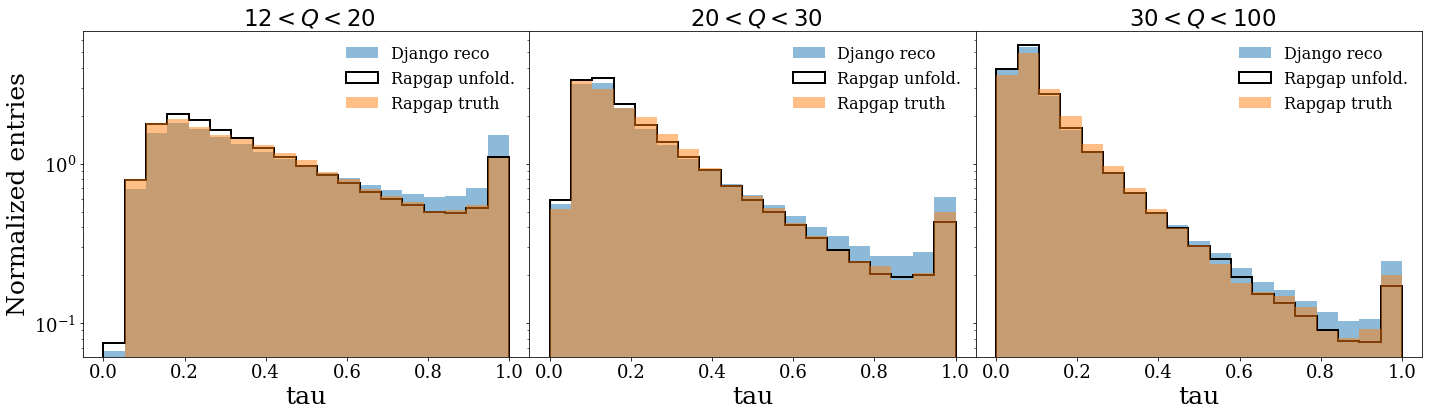

In [35]:
cut = ' gen_Q2 > 150 and gen_y>0.2 and gen_y<0.7'
cut = cut + ' and pass_reco==1'
bins = np.linspace(0,1,20) 

fig, axs = plt.subplots(1, 3,sharey=True, figsize=(24,6), gridspec_kw={'wspace':0, 'hspace':0})

for counter,edges in enumerate([(12,20), (20,30),(30,100)]):
    cut = ' gen_Q > %2.2f and gen_Q<%2.2f and gen_y>0.2 and gen_y<0.7'%(edges[0],edges[1])
    cut = cut + ' and pass_reco==1'#cut = ' Q2 > %2.2f and Q2 <%2.2f and pass_reco==1'%(edges[0],edges[1])
    #cut = 'Q>%2.2f and Q<%2.2f and pass_reco==1 and jet_pt>10'%(edges[0],edges[1])
    print (cut)
    print ('###########')

    axs[counter].xaxis.set_label_text(r'tau', fontsize=25)


    
    axs[counter].hist(mc_cut.query(cut)['gen_tauzQ'], bins=bins, label=mc_name+' reco', **plot_style_2)
    axs[counter].hist(mc_cut.query(cut)['gen_tauzQ'],
               bins=bins,
               weights=mc_cut.query(cut)['weight_truth'],
               label= altmc_name + ' unfold.',
               **plot_style_1)
    axs[counter].hist(altmc_cut.query(cut)['gen_tauzQ'],
               bins=bins,
               label=altmc_name + ' truth',
               **plot_style_2)    
    
    
    axs[counter].legend(prop={'size': 16}, frameon=False, loc='best')
    axs[counter].set_title(' $ %2.0f< Q < %2.0f$'%(edges[0],edges[1]))


    #axs[counter].text(1.5,2.9,  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(data_cut.query(cut)['x'].mean(), data_cut.query(cut)['Q2'].mean()), fontsize=18)
    axs[counter].set_yscale('log')
    #axs[counter].set_xscale('log')

 
axs[0].yaxis.set_label_text('Normalized entries', fontsize=25)



## check weights

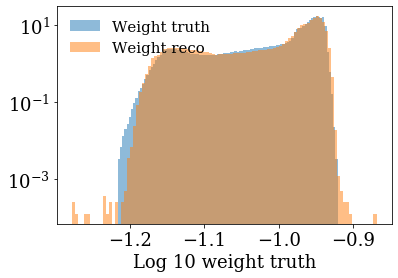

0.12771250307559967
0.04975038766860962
0.13005949556827545
0.029935143887996674
 
0.12575691938400269
0.04727989807724953
0.13588428497314453
0.06664219498634338
 
0.13203325867652893
0.050047192722558975
0.12700814008712769
0.058430615812540054
 
0.11998512595891953
0.060816776007413864
0.13533301651477814
0.05281512439250946
 


In [36]:
plt.hist(np.log10(mc_cut['weight_truth']),bins=100,**plot_style_2,label='Weight truth')
plt.hist(np.log10(mc_cut['weight_reco']),bins=100,**plot_style_2, label='Weight reco')
plt.legend()
plt.xlabel('Log 10 weight truth')
plt.yscale('log')
plt.show()

for i in range(len(weights)):
    print(max(weights[i, 1, :]))
    print(min(weights[i, 1, :]))
    print(max(weights[i, 0, :]))
    print(min(weights[i, 0, :]))
    print(' ')

In [37]:
K.clear_session()

## Define features with data

In [38]:
mc_cut = mc[:5000000]
altmc_cut = altmc#[:1000000]
data_cut = data#[:50000]

print(len(mc_cut))
print(len(data_cut))

5000000
215810


In [39]:
#mc_cut = pd.concat([mc_cut, altmc_cut])mc_cut = mc[:5000000]


In [40]:
print(len(data_cut))
print(len(mc_cut.query('pass_reco==1'))) ##only what is really reconstructed counts
print(len(mc_cut)) ##only what is really reconstructed counts


215810
5000000
5000000


In [41]:
Q_0_G       = mc_cut['gen_Q']
Q_0_S       = mc_cut['Q']
Q_unknown_S = data_cut['Q']


y_0_G       = mc_cut['gen_y']
y_0_S       = mc_cut['y']
y_unknown_S = data_cut['y']

tauzQ_0_G       = mc_cut['gen_tauzQ']
tauzQ_0_S       = mc_cut['tauzQ']
tauzQ_unknown_S = data_cut['tauzQ']

In [42]:
theta0_G=np.c_[(Q_0_G, y_0_G, tauzQ_0_G)]
theta0_S=np.c_[(Q_0_S, y_0_S, tauzQ_0_S)]
theta_unknown_S=np.c_[(Q_unknown_S, y_unknown_S, tauzQ_unknown_S)]


In [43]:
pass_reco = np.array(mc_cut['pass_reco'])
pass_truth = np.array(mc_cut['pass_truth'])
theta0_S[:,0][pass_reco==0] = -10
theta0_G[:,0][pass_truth==0] = -10

In [44]:
print(len(data_cut))
print(len(mc_cut.query('pass_reco==1'))) ##only what is really reconstructed counts
print(len(mc_cut)) ##only what is really reconstructed counts


215810
5000000
5000000


## Run unfolding on data

In [45]:
K.clear_session()

In [46]:
iterations = 4# use ~4 iterations
num_observables= 3

weights, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=theta0_G,
                       theta0_S=theta0_S,
                       theta_unknown_S= theta_unknown_S, verbose=0)


ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 3

STEP 1


STEP 2


ITERATION: 4

STEP 1


STEP 2



## Incorporate weights into the dataframe

In [47]:
mc_cut['weight_reco'] = weights[-1, 0, :]
mc_cut['weight_truth'] = weights[-1, 1, :]

/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Check weights

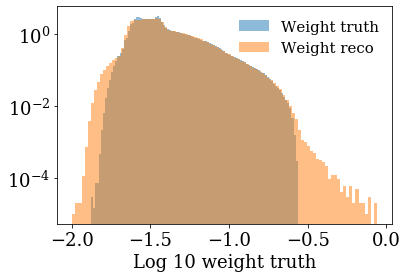

Iteration 0
0.2185903787612915 0.01341012492775917
0.3256652057170868 0.01161236222833395
 
Iteration 1
0.23986858129501343 0.01056030672043562
0.9821614027023315 0.01237497478723526
 
Iteration 2
0.2624531388282776 0.015498614870011806
0.26699239015579224 0.0076865702867507935
 
Iteration 3
0.2733987867832184 0.01315227523446083
0.8715248107910156 0.010092982091009617
 


In [48]:
plt.hist(np.log10(mc_cut['weight_truth']),bins=100,**plot_style_2,label='Weight truth')
plt.hist(np.log10(mc_cut['weight_reco']),bins=100,**plot_style_2, label='Weight reco')
plt.legend()
plt.xlabel('Log 10 weight truth')
plt.yscale('log')
plt.show()

for i in range(len(weights)):
    print ('Iteration %i'%i)
    print(max(weights[i, 1, :]), min(weights[i, 1, :]))    
    print(max(weights[i, 0, :]), min(weights[i, 0, :]))
    print(' ')

ITERATION: 1
ITERATION: 2
ITERATION: 3
ITERATION: 4


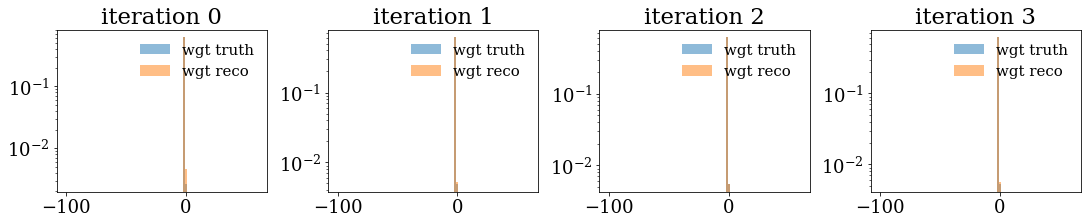

In [49]:
fig, ax = plt.subplots(1,
                           4,
                           figsize=(15, 3),
                           constrained_layout=True)
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    #bins = np.linspace(5, 50, 45)

    
    ax[i].hist(np.log10(weights[i, 1, :][~np.isnan(weights[i, 1, :])]),bins=100,range=(-100,60),**plot_style_2,label='wgt truth')
    ax[i].hist(np.log10(weights[i, 0, :][~np.isnan(weights[i, 0, :])]),bins=100,range=(-100,60),**plot_style_2, label='wgt reco') 
    ax[i].legend()
    ax[i].set_yscale('log')
    ax[i].set_title('iteration %i'%i)

    #ax[i].xlabel('Log 10 weight truth')

## Incorporate weights into the dataframe

## MC at reco level reweighted vs data

The query is: pass_reco==1 
ITERATION: 3
ITERATION: 4


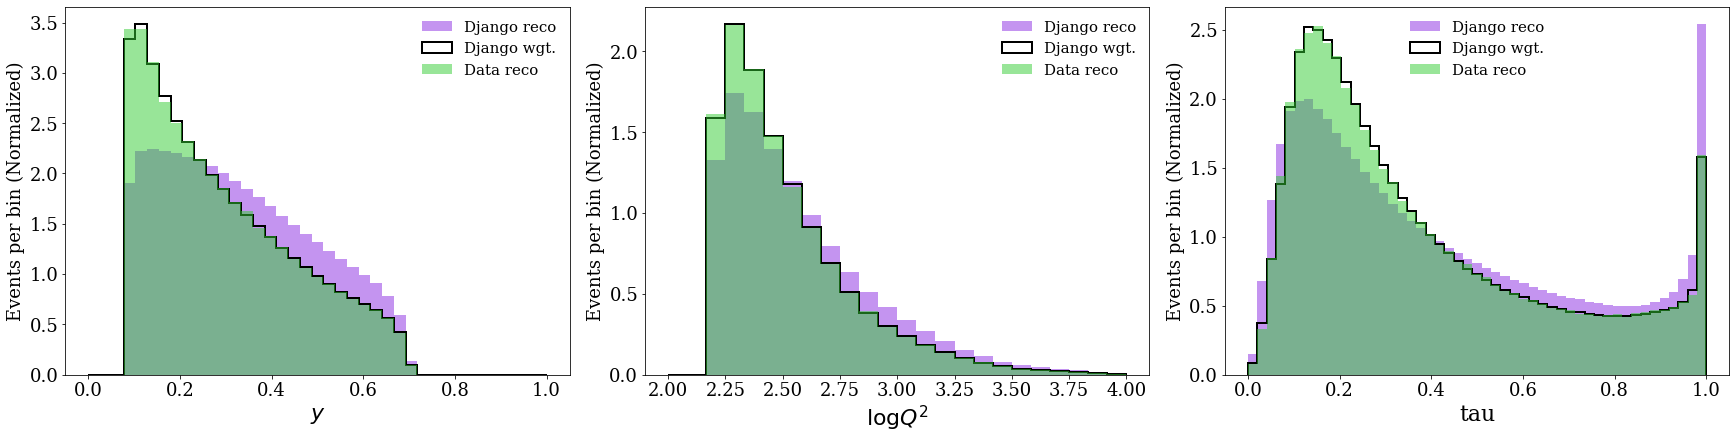

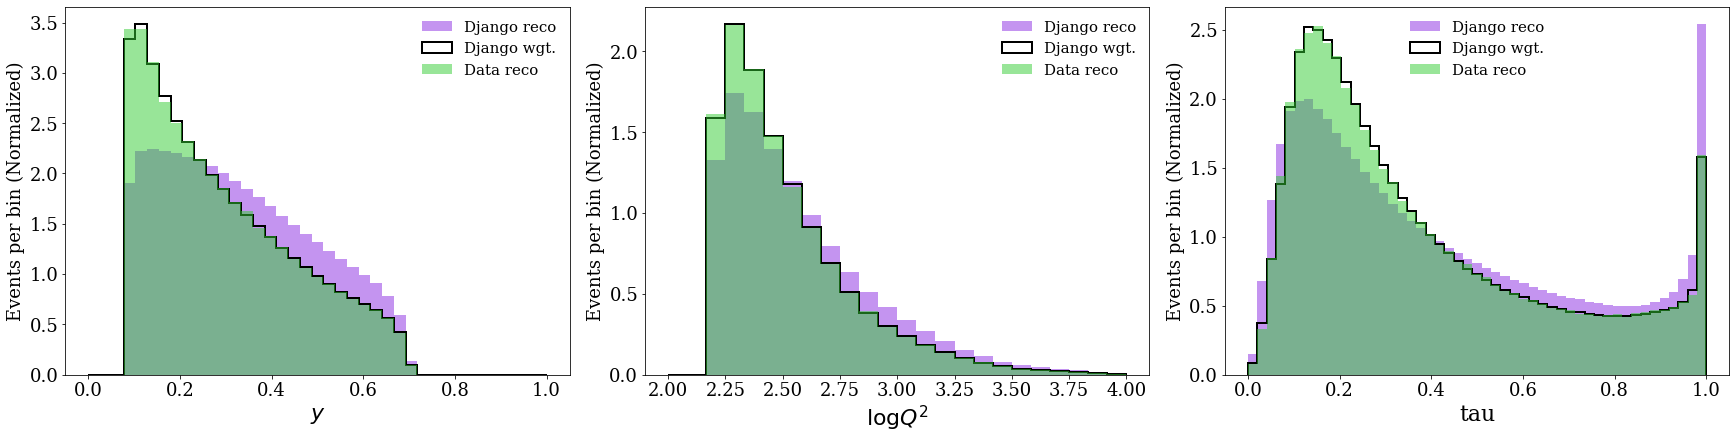

In [50]:
query = 'pass_reco==1 '
print('The query is:' , query)
label1 = mc_name +' reco'
label2 = mc_name +' wgt.'
label3 = 'Data reco'

color1='blueviolet'
color2='limegreen'
for i in range(len(weights)):
    if(i<2): continue

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2, 5,100 )
    fig, ax = plt.subplots(1,
                           3,
                           figsize=(24, 6),
                           constrained_layout=True)
    bins = np.linspace(0.0, 1.0,40 )
    
    ax = ax.flatten()

    ax[0].set_xlabel(r'$y$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(mc_cut.query(query)['y'], bins=bins, label=label1, **plot_style_2,color=color1)
    ax[0].hist(mc_cut.query(query)['y'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=label2,
               **plot_style_1)

    ax[0].hist(data_cut.query(query)['y'],
               bins=bins,
               label=label3,
               **plot_style_2,color=color2)
    
    ax[0].legend(frameon=False,loc='best')

    bins = np.linspace(2, 4,25 )

    ax[1].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(mc_cut.query(query)['logQ2'], bins=bins, label=label1, **plot_style_2,color=color1)
    ax[1].hist(mc_cut.query(query)['logQ2'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=label2,
               **plot_style_1)

    ax[1].hist(data_cut.query(query)['logQ2'],
               bins=bins,
               label=label3,
               **plot_style_2,color=color2)
    
    ax[1].legend(frameon=False,loc='best')

    
    bins = np.linspace(0,1,50 )

    ax[2].set_xlabel('tau',fontsize=22)
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(mc_cut.query(query)['tauzQ'], bins=bins, label=label1, **plot_style_2,color=color1)
    ax[2].hist(mc_cut.query(query)['tauzQ'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=label2,
               **plot_style_1)

    ax[2].hist(data_cut.query(query)['tauzQ'],
               bins=bins,
               label=label3,
               **plot_style_2,color=color2)
    #ax[0,2].set_yscale('log')
    #ax[0,2].set_xscale('log')
    ax[2].legend(frameon=False,loc='best')

    
   

## Plot unfolded results

The query is: pass_reco==1
ITERATION: 1
ITERATION: 2
ITERATION: 3
ITERATION: 4


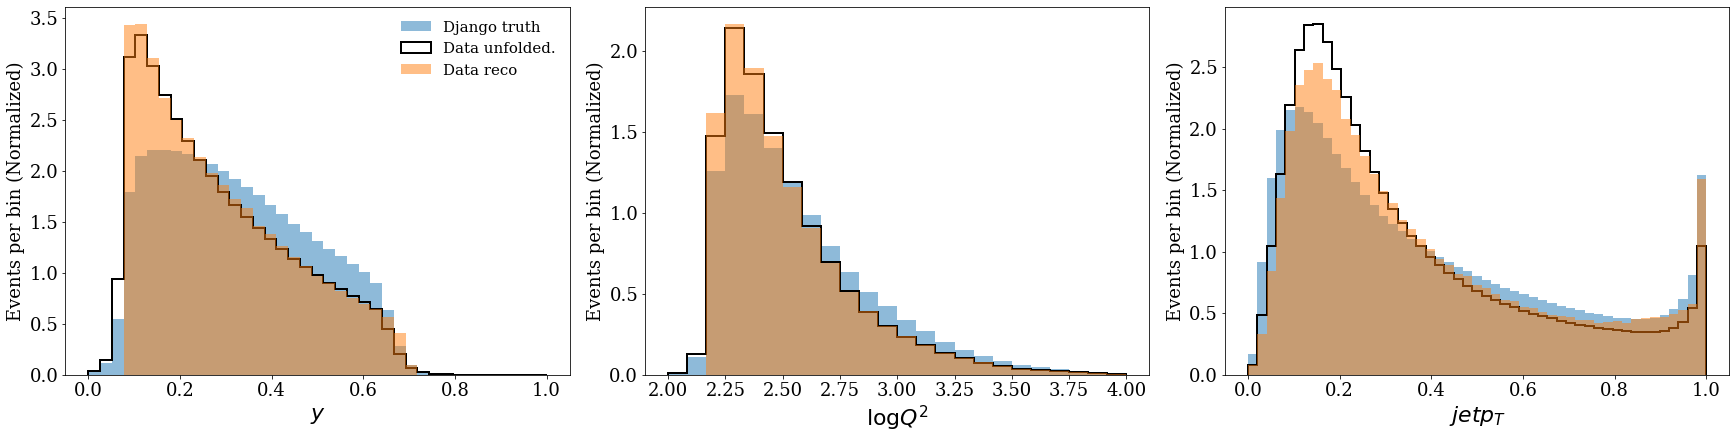

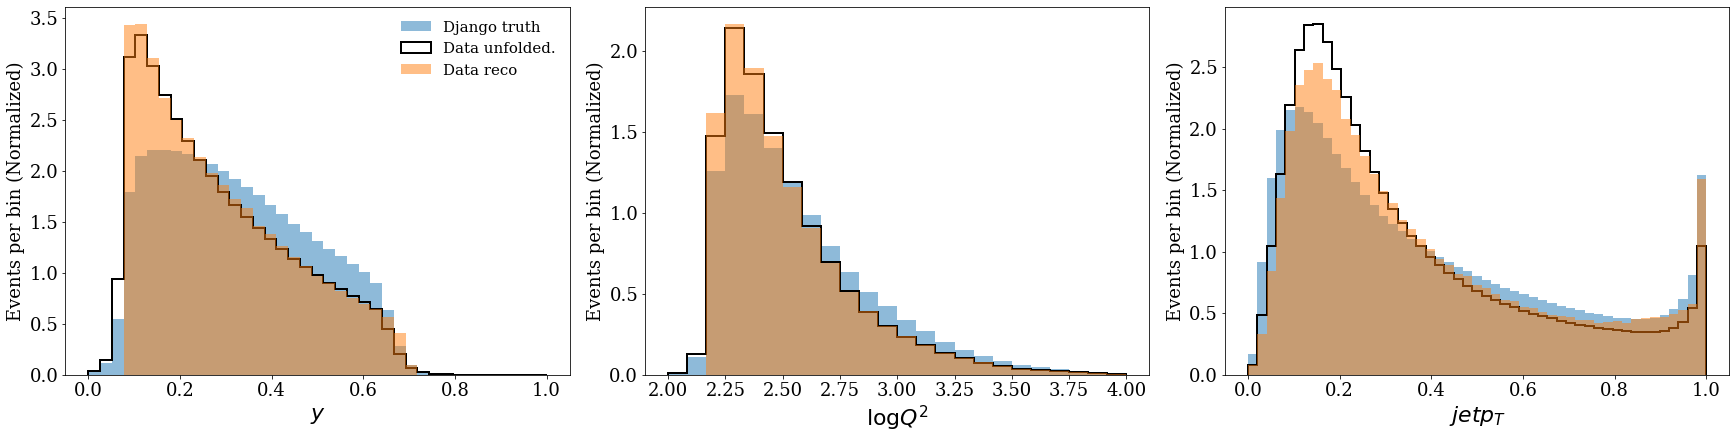

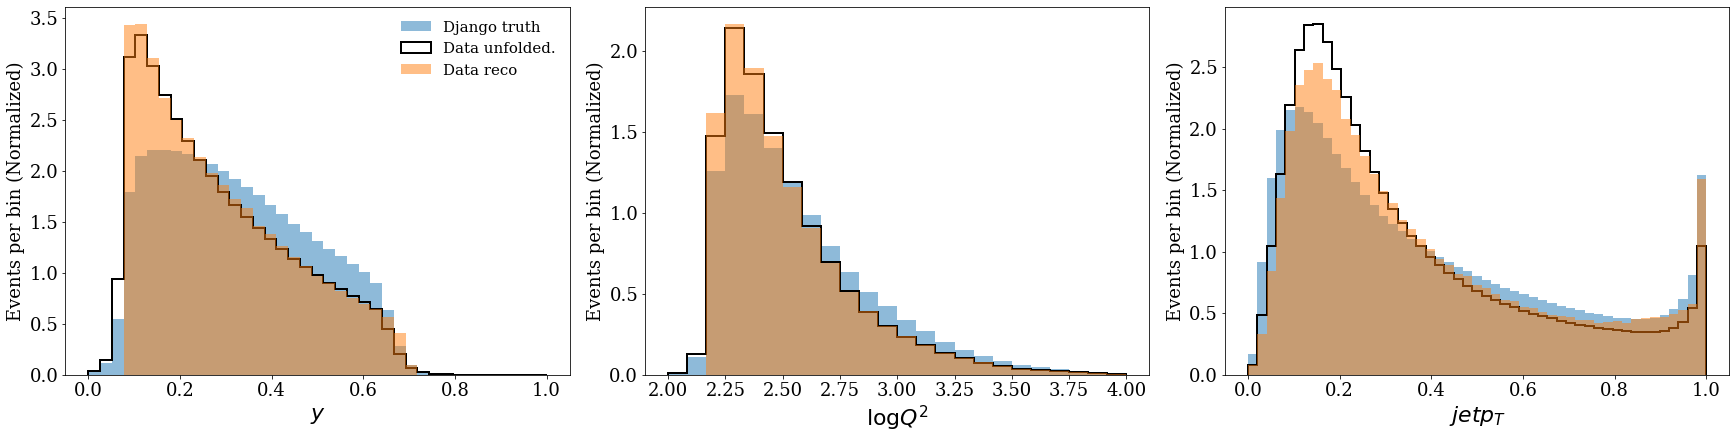

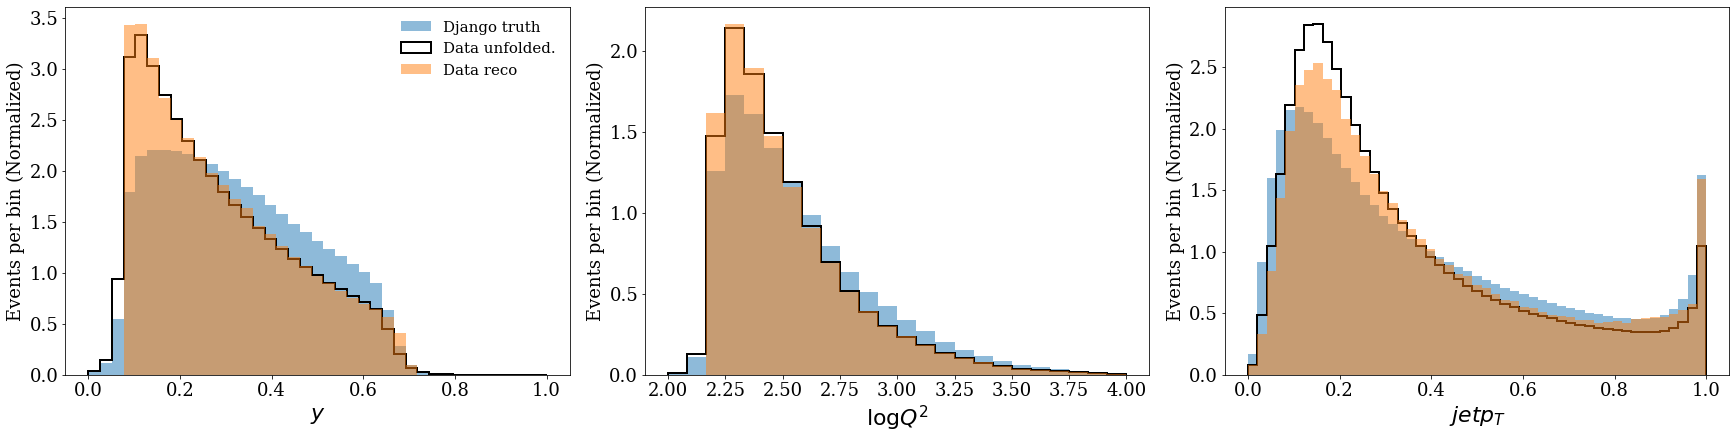

In [51]:
#event_selection = 'gen_y>0.2 and gen_y<0.7 and gen_Q2>150'
##track_selection = 'gen_track_pt>0.2'
#jet_selection    = 'gen_track_jetpt>15'
#query = 'pass_reco==1 and ' + event_selection + ' and ' + track_selection + ' and ' + jet_selection

query = 'pass_reco==1'
print('The query is:' , query)

label1 = r'Django truth'
label2 = r'Data unfolded.'
label3 = r'Data reco'

for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2, 5,100 )
    #bins = np.linspace(5, 50, 45)

    fig, ax = plt.subplots(1,
                           3,
                           figsize=(24, 6),
                           constrained_layout=True)
    bins = np.linspace(0.0, 1.0,40 )

    ax = ax.flatten()
    ax[0].set_xlabel(r'$y$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(mc_cut.query(query)['gen_y'], bins=bins, label=label1, **plot_style_2)
    ax[0].hist(mc_cut.query(query)['gen_y'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[0].hist(data_cut.query(query)['y'],
               bins=bins,
               label=label3,
               **plot_style_2)
    
    ax[0].legend(frameon=False)

    bins = np.linspace(2, 4,25 )

    ax[1].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(mc_cut.query(query)['gen_logQ2'], bins=bins, label=label1, **plot_style_2)
    ax[1].hist(mc_cut.query(query)['gen_logQ2'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[1].hist(data_cut.query(query)['logQ2'],
               bins=bins,
               label=label3,
               **plot_style_2)
    
    

    
    bins = np.linspace(0,1,50 )

    ax[2].set_xlabel(r'$jet p_{T} $',fontsize=22)
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(mc_cut.query(query)['gen_tauzQ'], bins=bins, label=label1, **plot_style_2)
    ax[2].hist(mc_cut.query(query)['gen_tauzQ'],
               bins=bins,
               weights=mc_cut.query(query)['weight_truth'],
               label=label2,
               **plot_style_1)

    ax[2].hist(data_cut.query(query)['tauzQ'],
               bins=bins,
               label=label3,
               **plot_style_2)
    


## Jet pT spectrum data reco vs MC reco

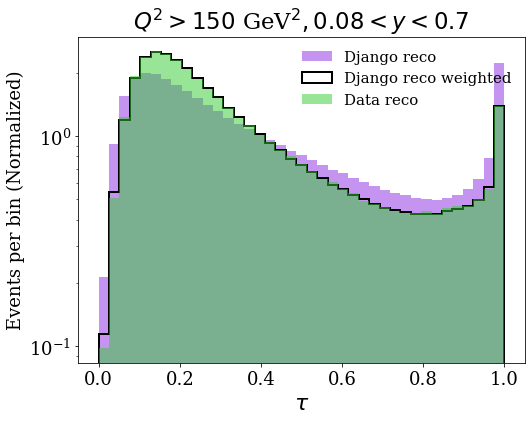

In [52]:
fig = plt.figure(figsize=(8,6))
query = 'pass_reco==1'
bins = np.linspace(0,1,40)
#bins = np.array([5,10,14,21,29,47,71,127])

#plt.set_xlabel(r'$ jet p_{T} $',fontsize=22)
#plt.set_ylabel('Events per bin (Normalized)')
plt.hist(mc_cut.query(query)['tauzQ'], bins=bins, label=mc_name+' reco', **plot_style_2,color=color1)
plt.hist(mc_cut.query(query)['tauzQ'],
               bins=bins,
               weights=mc_cut.query(query)['weight_reco'],
               label=mc_name +' reco weighted',
               **plot_style_1)

plt.hist(data_cut.query(query)['tauzQ'],
               bins=bins,
               label='Data reco',
               **plot_style_2,color=color2)
plt.legend()
plt.yscale('log')
plt.title(r'$Q^{2}>150$ GeV$^{2}, 0.08<y<0.7$')

plt.xlabel(r'$\tau$',fontsize=22)
plt.ylabel('Events per bin (Normalized)')
#plt.xscale('log')
plt.legend(frameon=False,loc='best')
#fig.savefig('figures/jetpt_reco.png'%i)  




## Data/MC agreement with differential 

Q>12.00 and Q<20.00 and pass_reco==1
###########
Q>20.00 and Q<30.00 and pass_reco==1
###########
Q>30.00 and Q<100.00 and pass_reco==1
###########


Text(0, 0.5, 'Normalized entries')

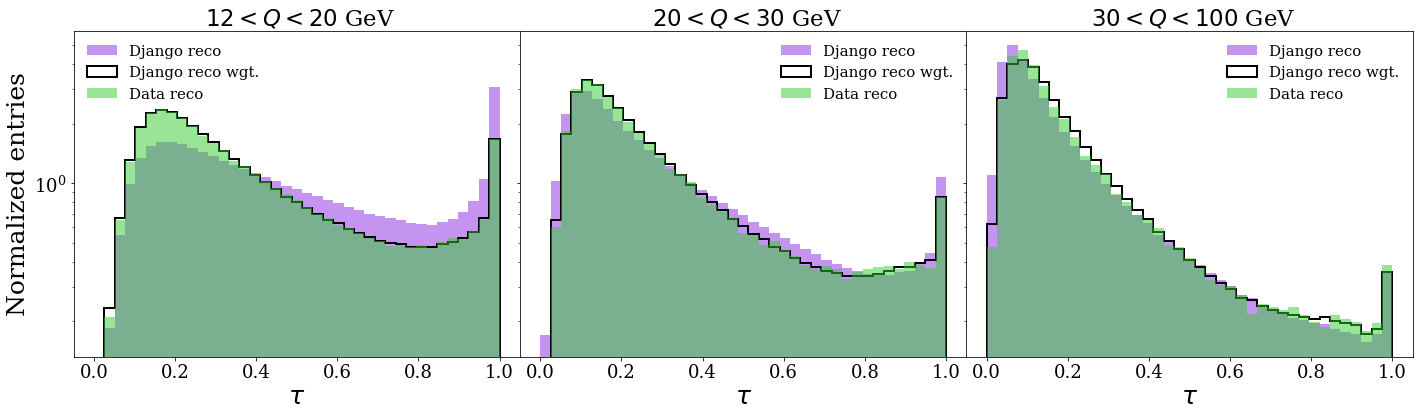

In [55]:
#bins = np.logspace(np.log10(0.01),np.log10(3),8)
bins = np.linspace(0,1,40)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(24,6), gridspec_kw={'wspace':0, 'hspace':0})

for counter,edges in enumerate([(12,20), (20,30),(30,100)]):
    #cut = ' Q2 > %2.2f and Q2 <%2.2f and pass_reco==1'%(edges[0],edges[1])
    cut = 'Q>%2.2f and Q<%2.2f and pass_reco==1'%(edges[0],edges[1])
    print (cut)
    print ('###########')

    axs[counter].xaxis.set_label_text(r'$\tau$', fontsize=25)


    
    axs[counter].hist(mc_cut.query(cut)['tauzQ'], bins=bins, label=mc_name+' reco', **plot_style_2,color=color1)
    axs[counter].hist(mc_cut.query(cut)['tauzQ'],
               bins=bins,
               weights=mc_cut.query(cut)['weight_reco'],
               label=mc_name +' reco wgt.',
               **plot_style_1)
    axs[counter].hist(data_cut.query(cut)['tauzQ'],
               bins=bins,
               label='Data reco',
               **plot_style_2,color=color2)    
    
    
    axs[counter].legend(prop={'size': 15}, frameon=False, loc='best')
    axs[counter].set_title(' $ %2.0f < Q < %2.0f$ GeV'%(edges[0],edges[1]))


    #axs[counter].text(1.5,2.9,  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(data_cut.query(cut)['x'].mean(), data_cut.query(cut)['Q2'].mean()), fontsize=18)
    axs[counter].set_yscale('log')
    #axs[counter].set_xscale('log')

 
axs[0].yaxis.set_label_text('Normalized entries', fontsize=25)



## Plot data, and unfolded results and MC truth

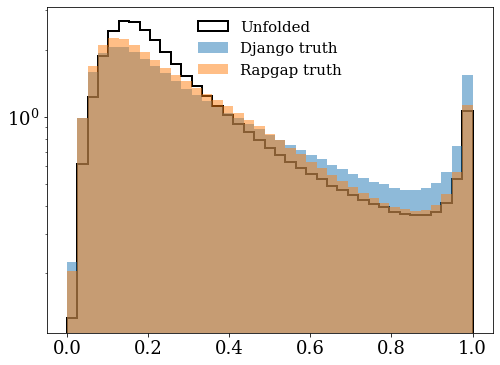

In [54]:
fig = plt.figure(figsize=(8,6))

cut = ' gen_Q2 > 150 and gen_y>0.2 and gen_y<0.7'

#bins = np.logspace(np.log10(15),np.log10(100),8)
bins = np.linspace(0,1,40)

#plt.hist(data['jet_pt'],bins=bins,label='Data (reco)',**plot_style_2)
#num,x,_ = plt.hist(altmc_cut.query(cut)['genjet_pt'],bins=bins,label='Rapgap Truth',**plot_style_2)
plt.hist(mc_cut.query(cut)['gen_tauzQ'],bins=bins,weights=mc_cut.query(cut)['weight_truth'],label = 'Unfolded',**plot_style_1)
plt.hist(mc_cut.query(cut)['gen_tauzQ'],bins=bins,label = 'Django truth',**plot_style_2)
plt.hist(altmc_cut.query(cut)['gen_tauzQ'],bins=bins,label = 'Rapgap truth',**plot_style_2)


plt.legend()
plt.yscale('log')
#plt.xscale('log')

plt.show()

## Bootstrapping

In [56]:
mc_cut = mc[:2000000]


In [57]:
print(len(data_cut))
print(len(mc_cut.query('pass_reco==1'))) ##only what is really reconstructed counts
print(len(mc_cut)) ##only what is really reconstructed counts


215810
2000000
2000000


In [58]:
Q_0_G       = mc_cut['gen_Q']
Q_0_S       = mc_cut['Q']

y_0_G       = mc_cut['gen_y']
y_0_S       = mc_cut['y']

tauzQ_0_G       = mc_cut['gen_tauzQ']
tauzQ_0_S       = mc_cut['tauzQ']

In [59]:
theta0_G=np.c_[(Q_0_G, y_0_G,tauzQ_0_G)]
theta0_S=np.c_[(Q_0_S, y_0_S,tauzQ_0_S)]
 

In [60]:
pass_reco = np.array(mc_cut['pass_reco'])
pass_truth = np.array(mc_cut['pass_truth'])
theta0_S[:,0][pass_reco==0] = -10
theta0_G[:,0][pass_truth==0] = -10

In [61]:
K.clear_session()

In [62]:
bootstraps = 50
iterations =  5
nvariables = 8
weights = [] 

import timeit


for i in range(bootstraps):
    start = timeit.timeit()

    print ('%i th jackknifedata'%i)
    K.clear_session()
    ## define the data input for the unfolding
    #bootstrap_data = data_cut.sample(data_cut.shape[0], replace=True)
    #add Poisson variation of total number of data events used:
    bootstrap_data = data_cut.sample(np.random.poisson(data_cut.shape[0],1)[0], replace=True)
    
    Q_unknown_S         = bootstrap_data['Q']
    y_unknown_S         = bootstrap_data['y']
    tauzQ_unknown_S     = bootstrap_data['tauzQ']

    theta_unknown_S =np.c_[(Q_unknown_S, y_unknown_S, tauzQ_unknown_S)]

    
    
    num_observables = 3
    i_weight, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=theta0_G,
                       theta0_S=theta0_S,
                       theta_unknown_S= theta_unknown_S,
                       verbose =0
                      )
    
    
    
    weights.append(i_weight)
    end = timeit.timeit()
    print(end - start)


0 th jackknifedata

ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 3

STEP 1


STEP 2


ITERATION: 4

STEP 1


STEP 2


ITERATION: 5

STEP 1


STEP 2

-0.001263575628399849
1 th jackknifedata

ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 3

STEP 1


STEP 2


ITERATION: 4

STEP 1


STEP 2


ITERATION: 5

STEP 1


STEP 2

-0.0001584300771355629
2 th jackknifedata

ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 3

STEP 1


STEP 2


ITERATION: 4

STEP 1


STEP 2


ITERATION: 5

STEP 1


STEP 2

-0.004198170732706785
3 th jackknifedata

ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 3

STEP 1


STEP 2


ITERATION: 4

STEP 1


STEP 2


ITERATION: 5

STEP 1


STEP 2

-0.00018058670684695244
4 th jackknifedata

ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 3

STEP 1


STEP 2


ITERATION: 4

STEP 1


STEP 2


ITERATION: 5

STEP 1


STEP 2

1.031393185257


STEP 2


ITERATION: 4

STEP 1


STEP 2


ITERATION: 5

STEP 1


STEP 2

-0.0003104358911514282
41 th jackknifedata

ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 3

STEP 1


STEP 2


ITERATION: 4

STEP 1


STEP 2


ITERATION: 5

STEP 1


STEP 2

-0.000342492014169693
42 th jackknifedata

ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 3

STEP 1


STEP 2


ITERATION: 4

STEP 1


STEP 2


ITERATION: 5

STEP 1


STEP 2

0.002779042813926935
43 th jackknifedata

ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 3

STEP 1


STEP 2


ITERATION: 4

STEP 1


STEP 2


ITERATION: 5

STEP 1


STEP 2

-0.0003139418549835682
44 th jackknifedata

ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 3

STEP 1


STEP 2


ITERATION: 4

STEP 1


STEP 2


ITERATION: 5

STEP 1


STEP 2

-0.003909388557076454
45 th jackknifedata

ITERATION: 1

STEP 1


STEP 2


ITERATION: 2

STEP 1


STEP 2


ITERATION: 

In [63]:
print(len(weights))

50


## for k in range(bootstraps):
    for i in range(len(weights[k])):
        print (weights[k].shape)
        print((weights[k][i, 1, :]).shape)
        print((weights[k][i, 1, :]).shape)
        print((weights[k][i, 1:2, :][0]).shape)


/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


[[1.         0.34221821 0.7381457  0.78223858 0.64772206 0.62343971]
 [0.34221821 1.         0.6611936  0.46066352 0.40193342 0.23164235]
 [0.7381457  0.6611936  1.         0.91437964 0.6900847  0.59010268]
 [0.78223858 0.46066352 0.91437964 1.         0.89047954 0.79311819]
 [0.64772206 0.40193342 0.6900847  0.89047954 1.         0.89807318]
 [0.62343971 0.23164235 0.59010268 0.79311819 0.89807318 1.        ]]


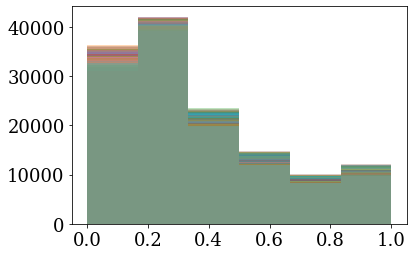

In [72]:
covariance_matrices = []
for it in range(5):
    myns = []
    #bins = np.logspace(np.log10(0.01),np.log10(80),6)
    #bins = np.logspace(np.log10(0.1),np.log10(np.pi),20)
    #bins = np.array([0.0, 2.05491515, 2.45354097, 2.63853135,
    #                 2.8145858,  2.98213597, 3.14159265])

    bins = np.linspace(0,1.0,7)
    #bins = np.logspace(np.log10(10),np.log10(100),5)
    cut = 'gen_Q2>150 and gen_y>0.2 and gen_y<0.7 and pass_reco==1'
    for k in range(len(weights)):
        mc_cut['weight_temp'] =weights[k][it, 1, :]

        n,b,_ = plt.hist(mc_cut.query(cut)['gen_tauzQ'],bins=bins,weights=mc_cut.query(cut)['weight_temp'],alpha=0.3)
        myns+=[n]
        pass
    myns = np.array(myns)
    #print(myns)
    #plt.xlabel('tau1b')

    cov = np.array([[np.mean((myns[:,j] - np.mean(myns[:,j]))*(myns[:,i] - np.mean(myns[:,i]))) for i in range(len(myns[0]))] for j in range(len(myns[0]))])
    corr = np.array([[cov[i,j]/(np.sqrt(cov[i,i])*np.sqrt(cov[j,j])) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

    covariance_matrices.append(corr)
    #fig, ax = plt.subplots() 
    #im = ax.imshow(corr,cmap='RdBu', vmin=0.0, vmax=1.0,
    #                         interpolation='none')
    #fig.colorbar(im,ax=ax)

print(covariance_matrices[0])
plt.show()

#print (len(myns))
#print (len(myns[0]))

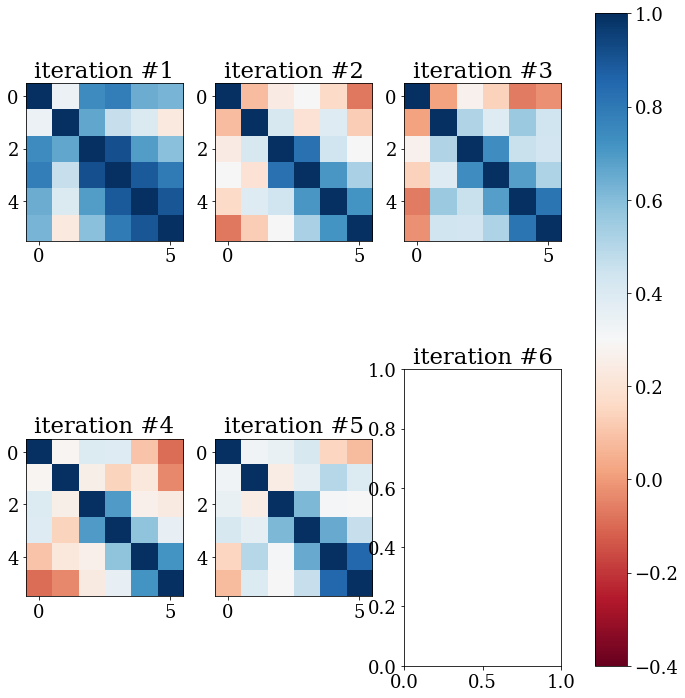

In [76]:
fig, ax = plt.subplots(2,3,figsize=(12,12)) 
minimo =-.40
maximo = 1.0

ax = ax.flatten()

im = ax[0].imshow(covariance_matrices[0],cmap='RdBu', vmin=minimo, vmax=1.0,
                             interpolation='none')
im = ax[1].imshow(covariance_matrices[1],cmap='RdBu', vmin=minimo, vmax=1.0,
                             interpolation='none')
im = ax[2].imshow(covariance_matrices[2],cmap='RdBu', vmin=minimo, vmax=1.0,
                  interpolation='none')
im = ax[3].imshow(covariance_matrices[3],cmap='RdBu', vmin=minimo, vmax=1.0,
                  interpolation='none')
im = ax[4].imshow(covariance_matrices[4],cmap='RdBu', vmin=minimo, vmax =1.0,
                  interpolation='none')
#im = ax[6].imshow(covariance_matrices[5],cmap='RdBu', vmin=minimo, vmax=1.0,
#                  interpolation='none')


ax[0].set_title('iteration #1')
ax[1].set_title('iteration #2')
ax[2].set_title('iteration #3')
ax[3].set_title('iteration #4')
ax[4].set_title('iteration #5')
ax[5].set_title('iteration #6')


plt.colorbar(im,ax=ax)
plt.show()

In [74]:
from numpy.linalg import inv
x = [] 
rhos= []
for it in range(4): #iterations
    temp = []
    cov = np.matrix(covariance_matrices[it])
    inversecov = inv(cov)
    for i in range(cov.shape[0]):
         if(cov[i,i]*inversecov[i,i]!=0):
            temp.append( np.sqrt(1- 1.0/(cov[i,i]*inversecov[i,i])))
    rho_it = np.average(temp)
    rhos.append(rho_it)
    x.append(it+1)
    print (rho_it)
print (x)
print (rhos)

0.9365020590919159
0.7837886423242431
0.7433847890653976
0.7151168761039567
[1, 2, 3, 4]
[0.9365020590919159, 0.7837886423242431, 0.7433847890653976, 0.7151168761039567]


(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 9 Text xticklabel objects>)

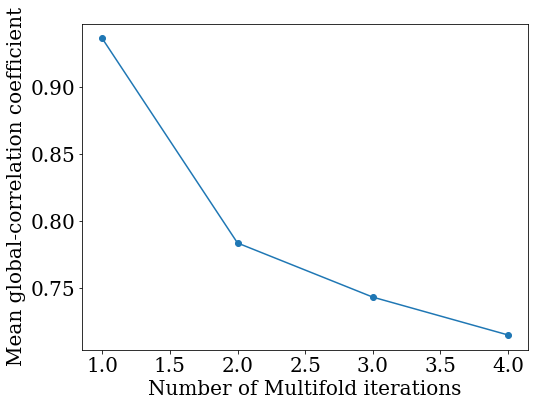

In [75]:
fig = plt.figure(figsize=(8,6))
plt.plot(x,rhos,'-o')
plt.xlabel('Number of Multifold iterations',fontsize=20)
plt.ylabel('Mean global-correlation coefficient',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [ ]:
cov = np.array([[np.mean((myns[:,j] - np.mean(myns[:,j]))*(myns[:,i] - np.mean(myns[:,i]))) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

In [ ]:
corr = np.array([[cov[i,j]/(np.sqrt(cov[i,i])*np.sqrt(cov[j,j])) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

In [ ]:
fig, ax = plt.subplots() 
im = ax.imshow(corr,cmap='RdBu', vmin=0.0, vmax=1.0,
                             interpolation='none')
fig.colorbar(im,ax=ax)
plt.show()